In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
# import weather data
weather_table = pd.read_csv("/Users/lukecraven/Downloads/weather_data.csv")
weather_table.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,01/09/2021,18.1,14.6,16.3,18.1,14.6,16.3,11.7,74.36,0.0,...,5.3,2,NaN,2021-09-01T06:13:14,2021-09-01T19:46:39,0.86,Clear,Clear conditions throughout the day.,clear-day,"03680099999,D5621,03672099999,03781099999,0377..."
1,02/09/2021,19.6,15.5,17.0,19.6,15.5,17.0,11.9,72.16,0.0,...,6.7,4,NaN,2021-09-02T06:14:49,2021-09-02T19:44:25,0.90,Clear,Clear conditions throughout the day.,clear-day,"03680099999,D5621,03672099999,03781099999,0377..."
2,03/09/2021,21.1,14.6,17.7,21.1,14.6,17.7,12.8,73.18,0.0,...,6.2,3,NaN,2021-09-03T06:16:25,2021-09-03T19:42:10,0.94,Clear,Clear conditions throughout the day.,clear-day,"03680099999,D5621,03672099999,03781099999,F666..."
3,04/09/2021,19.1,14.5,16.8,19.1,14.5,16.8,13.1,78.88,0.0,...,4.1,2,NaN,2021-09-04T06:18:00,2021-09-04T19:39:55,0.97,Clear,Clear conditions throughout the day.,clear-day,"03680099999,D5621,03672099999,03781099999,0377..."
4,05/09/2021,25.2,14.1,18.9,25.2,14.1,18.9,14.2,75.36,0.0,...,8.2,6,NaN,2021-09-05T06:19:36,2021-09-05T19:37:40,0.99,Clear,Clear conditions throughout the day.,clear-day,"03680099999,D5621,03672099999,03781099999,0377..."


In [3]:
weather_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          108 non-null    object 
 1   tempmax           108 non-null    float64
 2   tempmin           108 non-null    float64
 3   temp              108 non-null    float64
 4   feelslikemax      108 non-null    float64
 5   feelslikemin      108 non-null    float64
 6   feelslike         108 non-null    float64
 7   dew               108 non-null    float64
 8   humidity          108 non-null    float64
 9   precip            108 non-null    float64
 10  precipprob        0 non-null      float64
 11  precipcover       108 non-null    float64
 12  preciptype        0 non-null      float64
 13  snow              0 non-null      float64
 14  snowdepth         2 non-null      float64
 15  windgust          40 non-null     float64
 16  windspeed         108 non-null    float64
 1

In [4]:
# remove null columns
clean_weather_table = weather_table.dropna(axis=1, how='all')
clean_weather_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          108 non-null    object 
 1   tempmax           108 non-null    float64
 2   tempmin           108 non-null    float64
 3   temp              108 non-null    float64
 4   feelslikemax      108 non-null    float64
 5   feelslikemin      108 non-null    float64
 6   feelslike         108 non-null    float64
 7   dew               108 non-null    float64
 8   humidity          108 non-null    float64
 9   precip            108 non-null    float64
 10  precipcover       108 non-null    float64
 11  snowdepth         2 non-null      float64
 12  windgust          40 non-null     float64
 13  windspeed         108 non-null    float64
 14  winddir           108 non-null    float64
 15  sealevelpressure  108 non-null    float64
 16  cloudcover        108 non-null    float64
 1

In [5]:
# subset required colums
short_weather_table = clean_weather_table[['datetime', 'tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'precipcover', 'windspeed', 'uvindex', 'conditions', 'description']]
short_weather_table.head()

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windspeed,uvindex,conditions,description
0,01/09/2021,18.1,14.6,16.3,74.36,0.0,0.0,10.5,2,Clear,Clear conditions throughout the day.
1,02/09/2021,19.6,15.5,17.0,72.16,0.0,0.0,13.2,4,Clear,Clear conditions throughout the day.
2,03/09/2021,21.1,14.6,17.7,73.18,0.0,0.0,9.0,3,Clear,Clear conditions throughout the day.
3,04/09/2021,19.1,14.5,16.8,78.88,0.0,0.0,9.3,2,Clear,Clear conditions throughout the day.
4,05/09/2021,25.2,14.1,18.9,75.36,0.0,0.0,6.9,6,Clear,Clear conditions throughout the day.


In [6]:
# import e-commerce data
ecomm_table = pd.read_csv("/Users/lukecraven/Desktop/dummy_transactions.csv")
ecomm_table.head()

,Day Index,Transactions
0,01/09/2021,12
1,02/09/2021,18
2,03/09/2021,20
3,04/09/2021,1
4,05/09/2021,1


In [7]:
ecomm_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Day Index     108 non-null    object
 1   Transactions  108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [8]:
# rename coumn day index to datetime
ecomm_table = ecomm_table.rename(columns= {'Day Index' : 'datetime'})
ecomm_table.head()

,datetime,Transactions
0,01/09/2021,12
1,02/09/2021,18
2,03/09/2021,20
3,04/09/2021,1
4,05/09/2021,1


In [9]:
# merge tables
all_data = pd.merge(short_weather_table, ecomm_table)

In [10]:
all_data.head()

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windspeed,uvindex,conditions,description,Transactions
0,01/09/2021,18.1,14.6,16.3,74.36,0.0,0.0,10.5,2,Clear,Clear conditions throughout the day.,12
1,02/09/2021,19.6,15.5,17.0,72.16,0.0,0.0,13.2,4,Clear,Clear conditions throughout the day.,18
2,03/09/2021,21.1,14.6,17.7,73.18,0.0,0.0,9.0,3,Clear,Clear conditions throughout the day.,20
3,04/09/2021,19.1,14.5,16.8,78.88,0.0,0.0,9.3,2,Clear,Clear conditions throughout the day.,1
4,05/09/2021,25.2,14.1,18.9,75.36,0.0,0.0,6.9,6,Clear,Clear conditions throughout the day.,1


In [11]:
# convert transactions to type int
all_data['Transactions'] = all_data['Transactions'].astype(int)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      108 non-null    object 
 1   tempmax       108 non-null    float64
 2   tempmin       108 non-null    float64
 3   temp          108 non-null    float64
 4   humidity      108 non-null    float64
 5   precip        108 non-null    float64
 6   precipcover   108 non-null    float64
 7   windspeed     108 non-null    float64
 8   uvindex       108 non-null    int64  
 9   conditions    108 non-null    object 
 10  description   108 non-null    object 
 11  Transactions  108 non-null    int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 11.0+ KB


In [12]:
# start regression modelling using scikit-learn package
import scipy.stats as stats

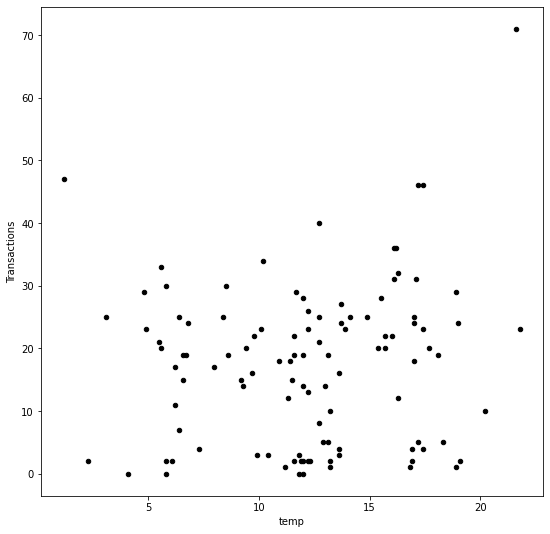

In [13]:
# plotting data on scatter plot
all_data.plot(kind='scatter',
              x='temp',
              y='Transactions',
              figsize=(9,9),
              color="black"); # exploratory independent variable

In [14]:
from sklearn import linear_model

# initialise model
regression_model = linear_model.LinearRegression()

# train model using all_data
regression_model.fit(X = pd.DataFrame(all_data["temp"]),
                     y = all_data["Transactions"])

# check trained model y intercept
print(regression_model.intercept_)

# check trained model coefficients
print(regression_model.coef_)

# output says y value (temp) is 13.51
# everytime temp rises by 1 unit, predicted transactions increase by +0.32

13.515013585796348
[0.31647888]


In [15]:
# calculate R squared value to sense how good of a predictor regression model is
regression_model.score(X = pd.DataFrame(all_data["temp"]),
                     y = all_data["Transactions"])

# R ranges between 0 and 1, denotes proportion of variance in the dependent variable explained by the exploratory variable
# about 1.23% of the variance in transactions can be explained by the temp?

0.012545635734108274

In [16]:
# train prediction variable for plot
train_prediction = regression_model.predict(X = pd.DataFrame(all_data["temp"]))

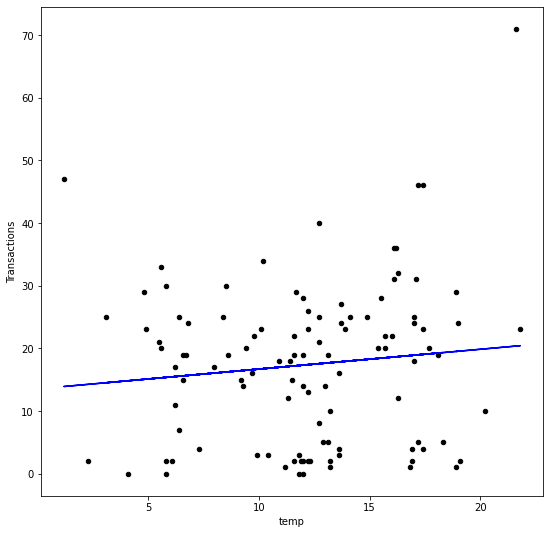

In [17]:
all_data.plot(kind='scatter',
              x='temp',
              y='Transactions',
              figsize=(9,9),
              color="black");

# plot regression line
plt.plot(all_data["temp"],
         train_prediction,
         color="blue");

plt.style.use("ggplot")
plt.show()

In [18]:
# convert datetime column from object to datetime
all_data['datetime'] = pd.to_datetime(all_data['datetime'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      108 non-null    datetime64[ns]
 1   tempmax       108 non-null    float64       
 2   tempmin       108 non-null    float64       
 3   temp          108 non-null    float64       
 4   humidity      108 non-null    float64       
 5   precip        108 non-null    float64       
 6   precipcover   108 non-null    float64       
 7   windspeed     108 non-null    float64       
 8   uvindex       108 non-null    int64         
 9   conditions    108 non-null    object        
 10  description   108 non-null    object        
 11  Transactions  108 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 11.0+ KB


In [19]:
# add column day name of week
all_data["day_name"] = all_data['datetime'].dt.day_name()
all_data.head()

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windspeed,uvindex,conditions,description,Transactions,day_name
0,2021-01-09,18.1,14.6,16.3,74.36,0.0,0.0,10.5,2,Clear,Clear conditions throughout the day.,12,Saturday
1,2021-02-09,19.6,15.5,17.0,72.16,0.0,0.0,13.2,4,Clear,Clear conditions throughout the day.,18,Tuesday
2,2021-03-09,21.1,14.6,17.7,73.18,0.0,0.0,9.0,3,Clear,Clear conditions throughout the day.,20,Tuesday
3,2021-04-09,19.1,14.5,16.8,78.88,0.0,0.0,9.3,2,Clear,Clear conditions throughout the day.,1,Friday
4,2021-05-09,25.2,14.1,18.9,75.36,0.0,0.0,6.9,6,Clear,Clear conditions throughout the day.,1,Sunday


In [20]:
# transform column datetime from object to datetime
all_data['datetime'] = pd.to_datetime(all_data['datetime'], dayfirst=False)

In [21]:
display(all_data)

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windspeed,uvindex,conditions,description,Transactions,day_name
0,2021-01-09,18.1,14.6,16.3,74.36,0.0,0.00,10.5,2,Clear,Clear conditions throughout the day.,12,Saturday
1,2021-02-09,19.6,15.5,17.0,72.16,0.0,0.00,13.2,4,Clear,Clear conditions throughout the day.,18,Tuesday
2,2021-03-09,21.1,14.6,17.7,73.18,0.0,0.00,9.0,3,Clear,Clear conditions throughout the day.,20,Tuesday
3,2021-04-09,19.1,14.5,16.8,78.88,0.0,0.00,9.3,2,Clear,Clear conditions throughout the day.,1,Friday
4,2021-05-09,25.2,14.1,18.9,75.36,0.0,0.00,6.9,6,Clear,Clear conditions throughout the day.,1,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2021-12-13,11.8,9.8,10.9,85.82,0.2,4.17,0.1,1,Rain,Clear conditions throughout the day with after...,18,Monday
104,2021-12-14,12.8,9.6,11.3,87.41,0.0,4.17,0.1,1,Clear,Clear conditions throughout the day.,12,Tuesday
105,2021-12-15,13.1,10.1,12.2,79.27,0.0,0.00,0.1,0,Clear,Clear conditions throughout the day.,23,Wednesday
106,2021-12-16,12.1,10.8,11.5,72.12,0.0,0.00,2.3,0,Clear,Clear conditions throughout the day.,15,Thursday


In [24]:
# add another date column in correct format
import datetime
all_data['date2'] = all_data['datetime'].dt.strftime('%Y-%m-%d')

In [25]:
all_data.head()

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windspeed,uvindex,conditions,description,Transactions,day_name,date2
0,2021-01-09,18.1,14.6,16.3,74.36,0.0,0.0,10.5,2,Clear,Clear conditions throughout the day.,12,Saturday,2021-01-09
1,2021-02-09,19.6,15.5,17.0,72.16,0.0,0.0,13.2,4,Clear,Clear conditions throughout the day.,18,Tuesday,2021-02-09
2,2021-03-09,21.1,14.6,17.7,73.18,0.0,0.0,9.0,3,Clear,Clear conditions throughout the day.,20,Tuesday,2021-03-09
3,2021-04-09,19.1,14.5,16.8,78.88,0.0,0.0,9.3,2,Clear,Clear conditions throughout the day.,1,Friday,2021-04-09
4,2021-05-09,25.2,14.1,18.9,75.36,0.0,0.0,6.9,6,Clear,Clear conditions throughout the day.,1,Sunday,2021-05-09
